In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('./train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)

data # 데이터를 확인합니다.

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


In [2]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


In [3]:
# 기초 통계량을 살펴봅니다.
data.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


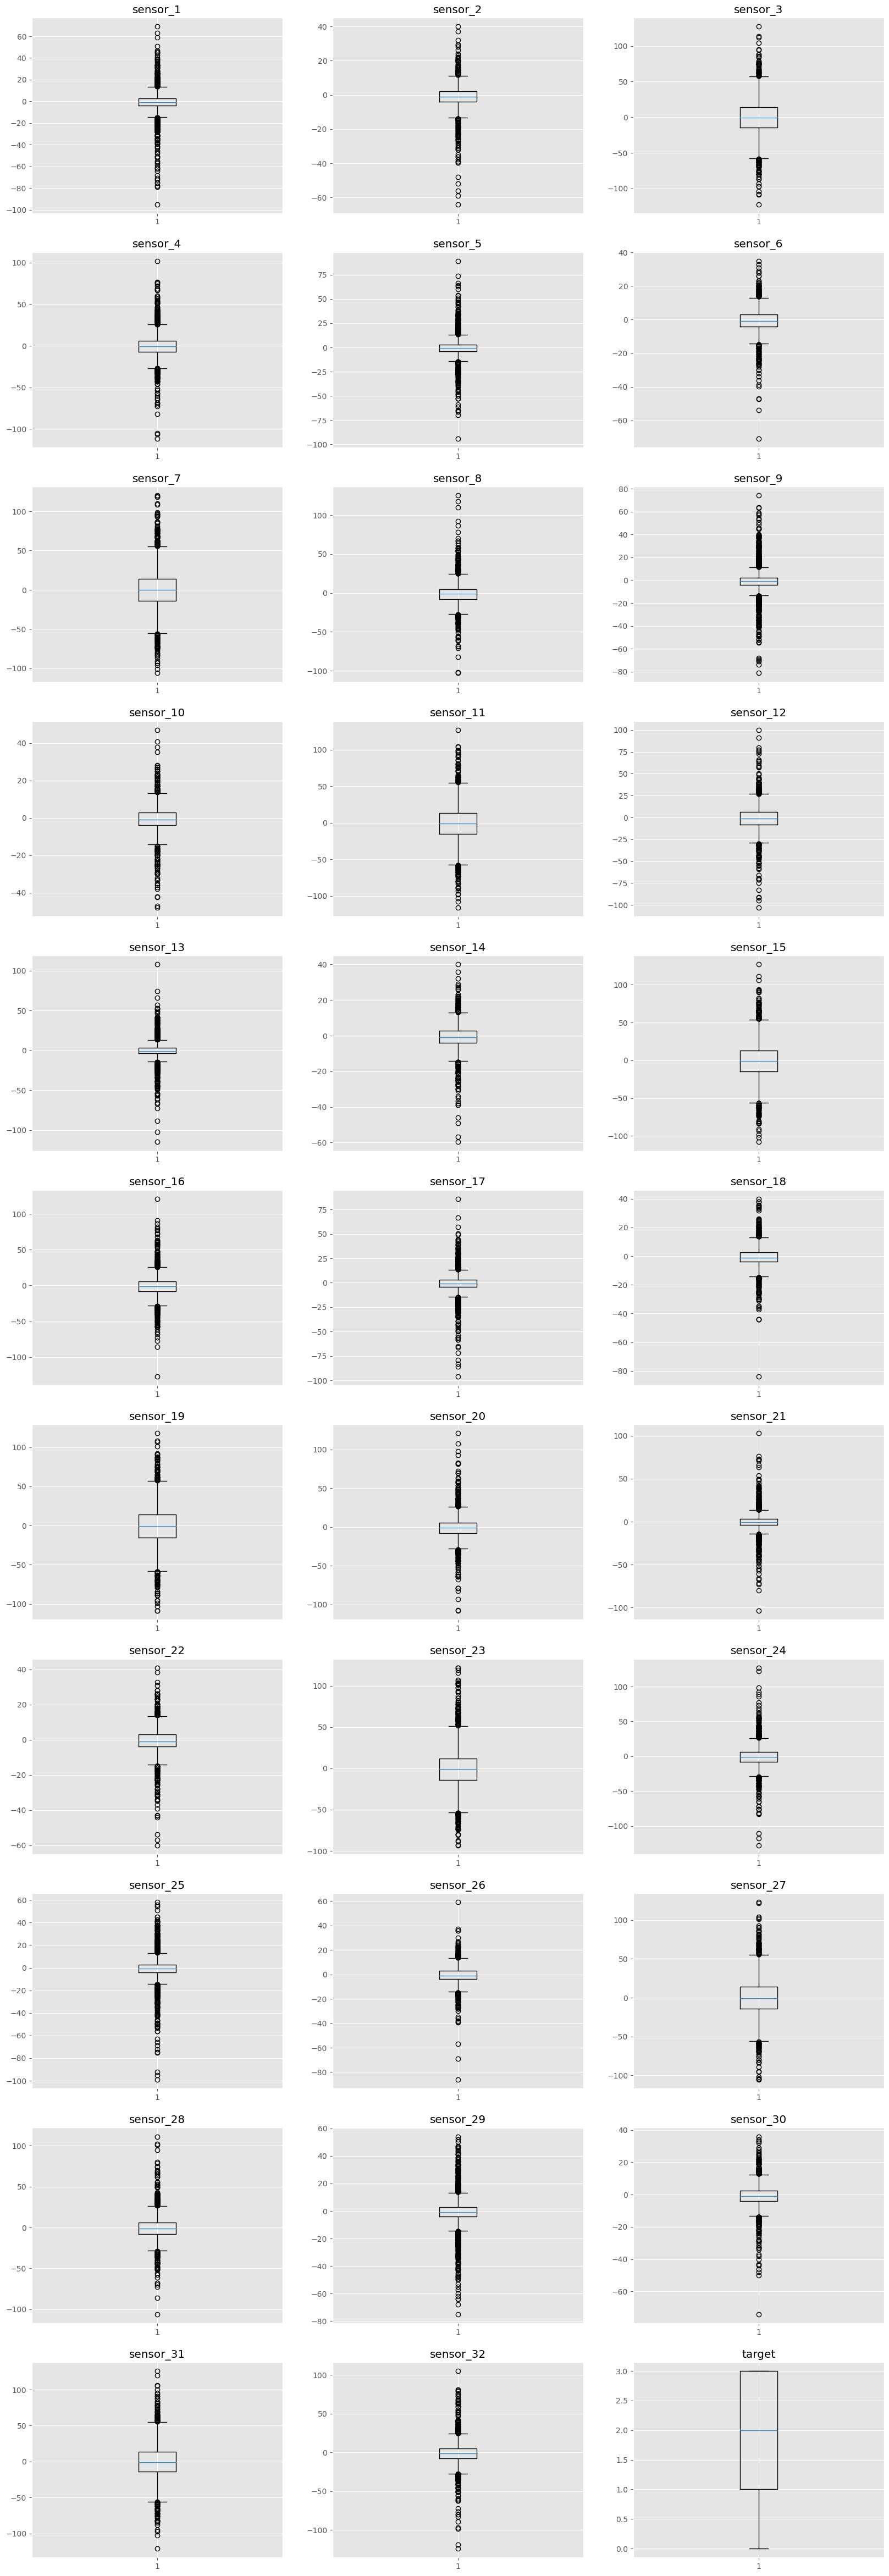

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = data.columns
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

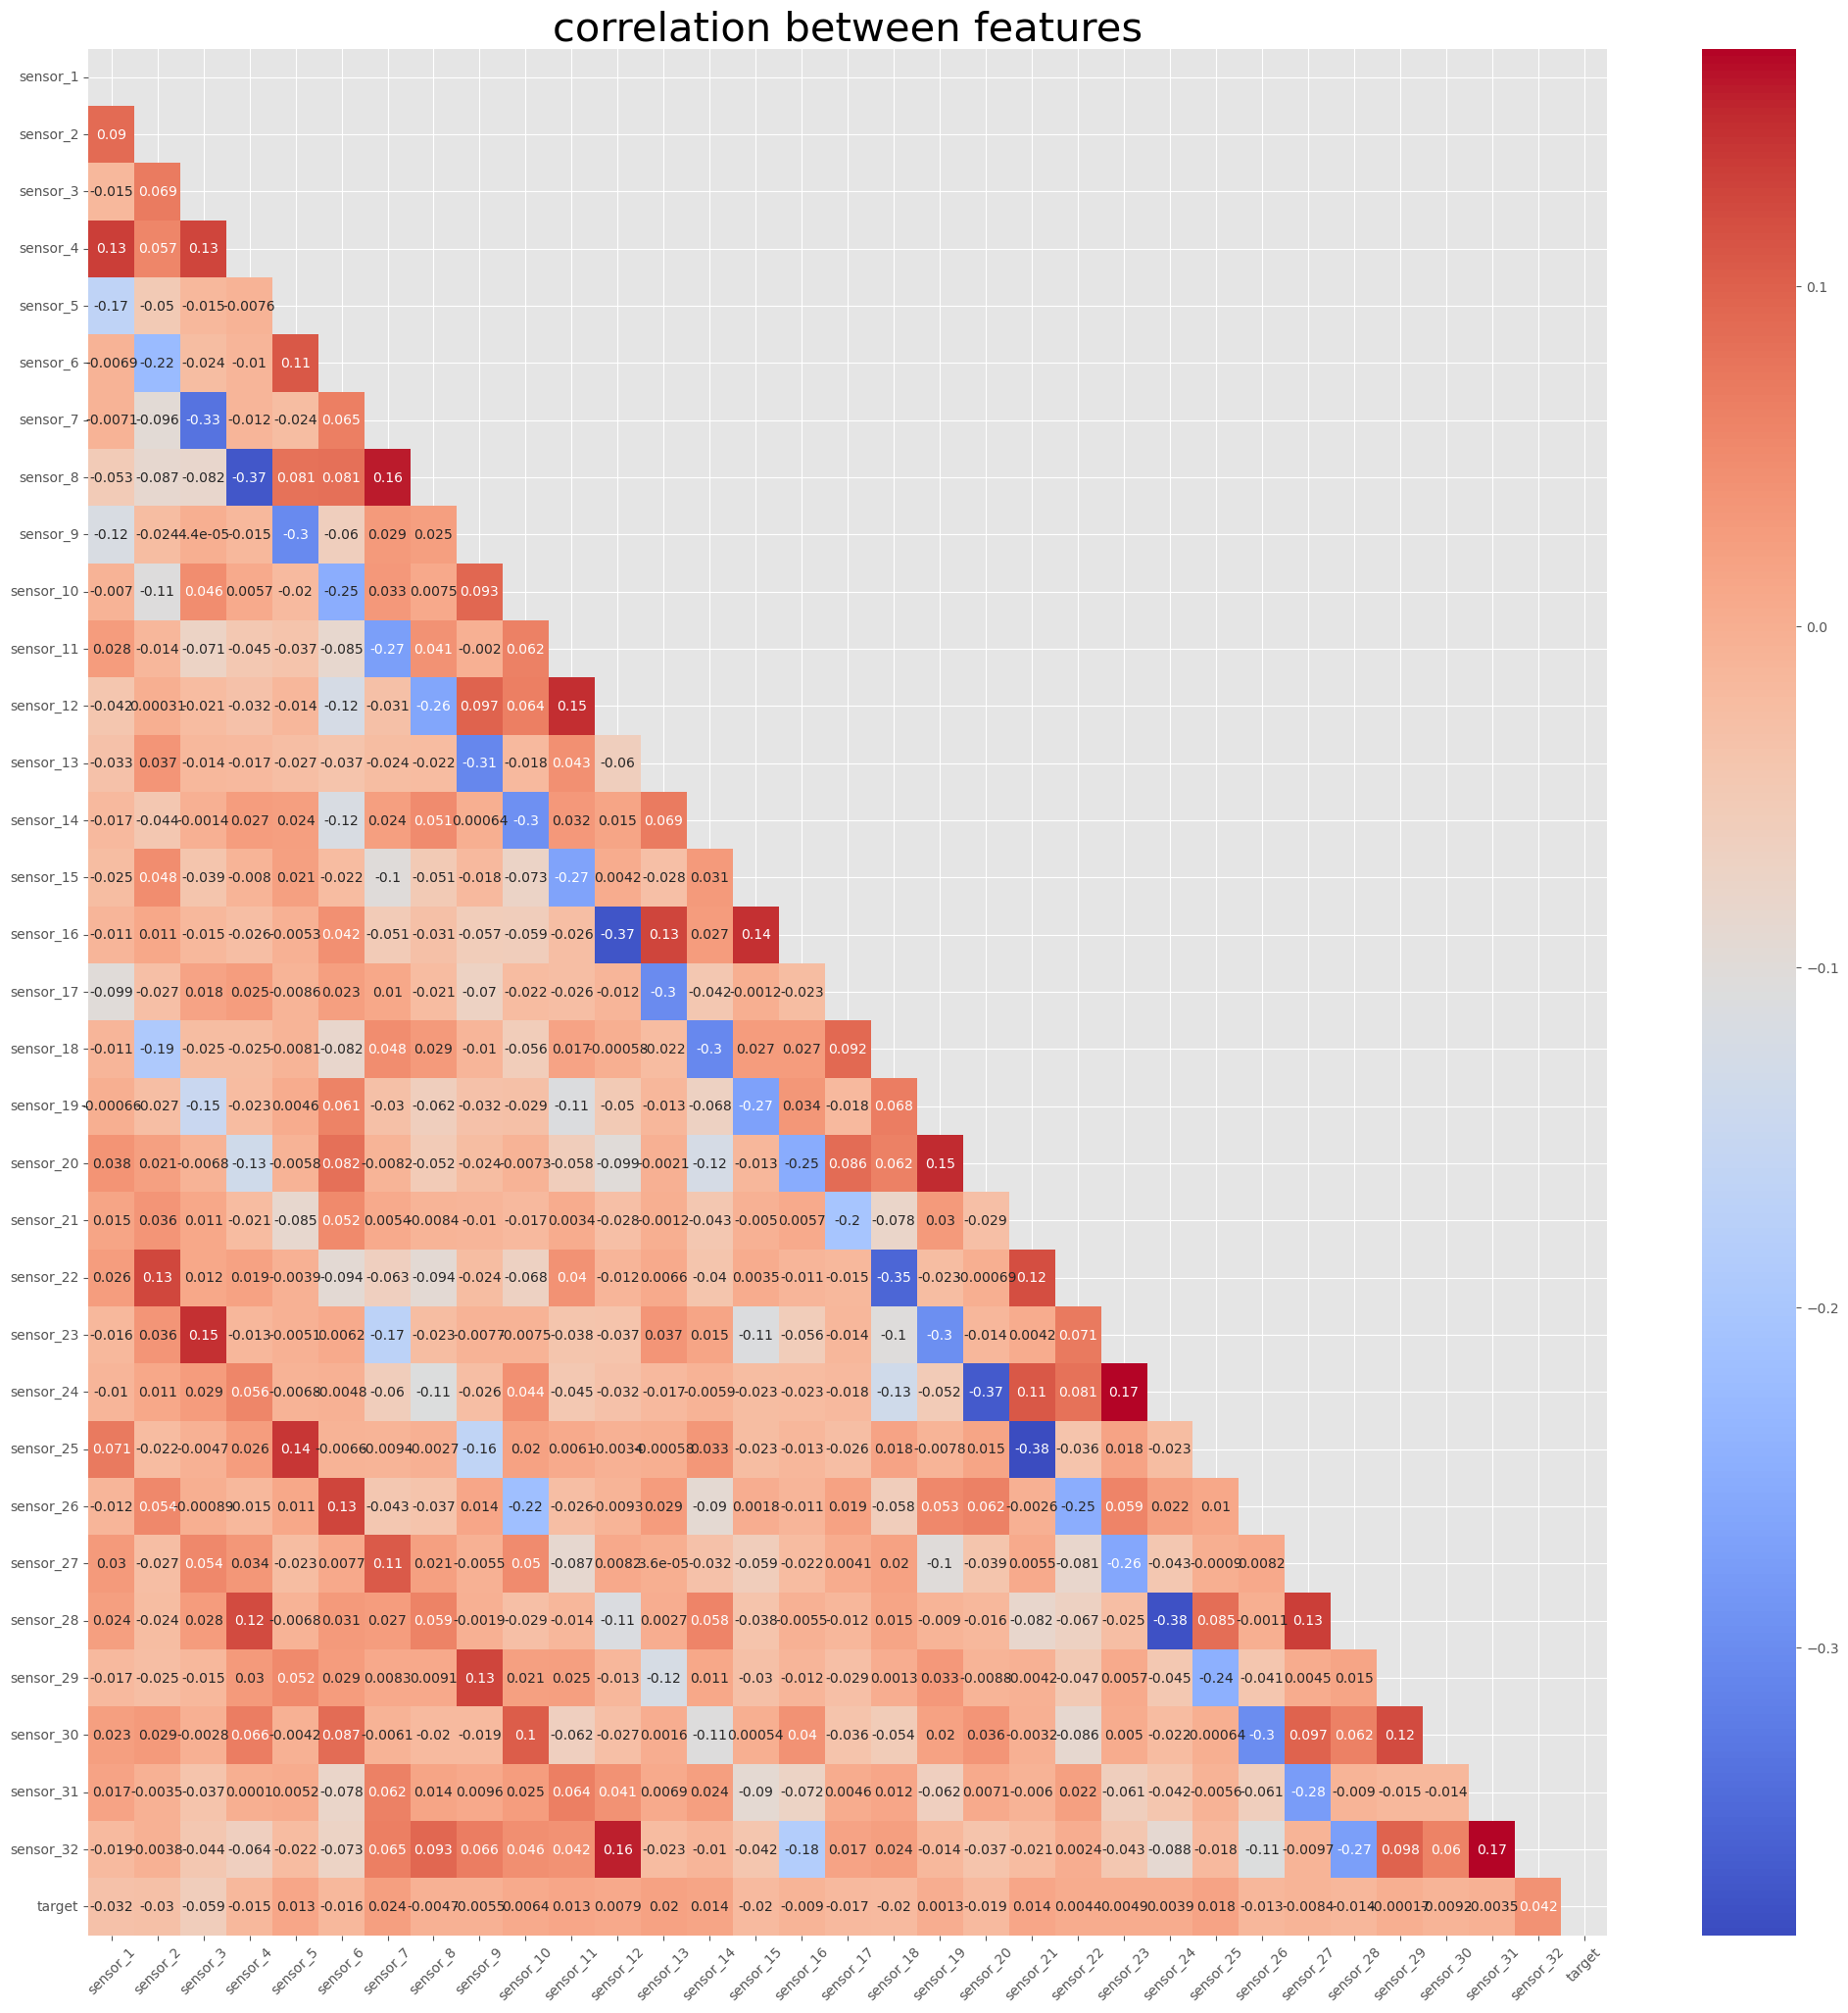

In [5]:
plt.figure(figsize=(25,25))

heat_table = data.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=30)
plt.show()

In [6]:
target = "target"

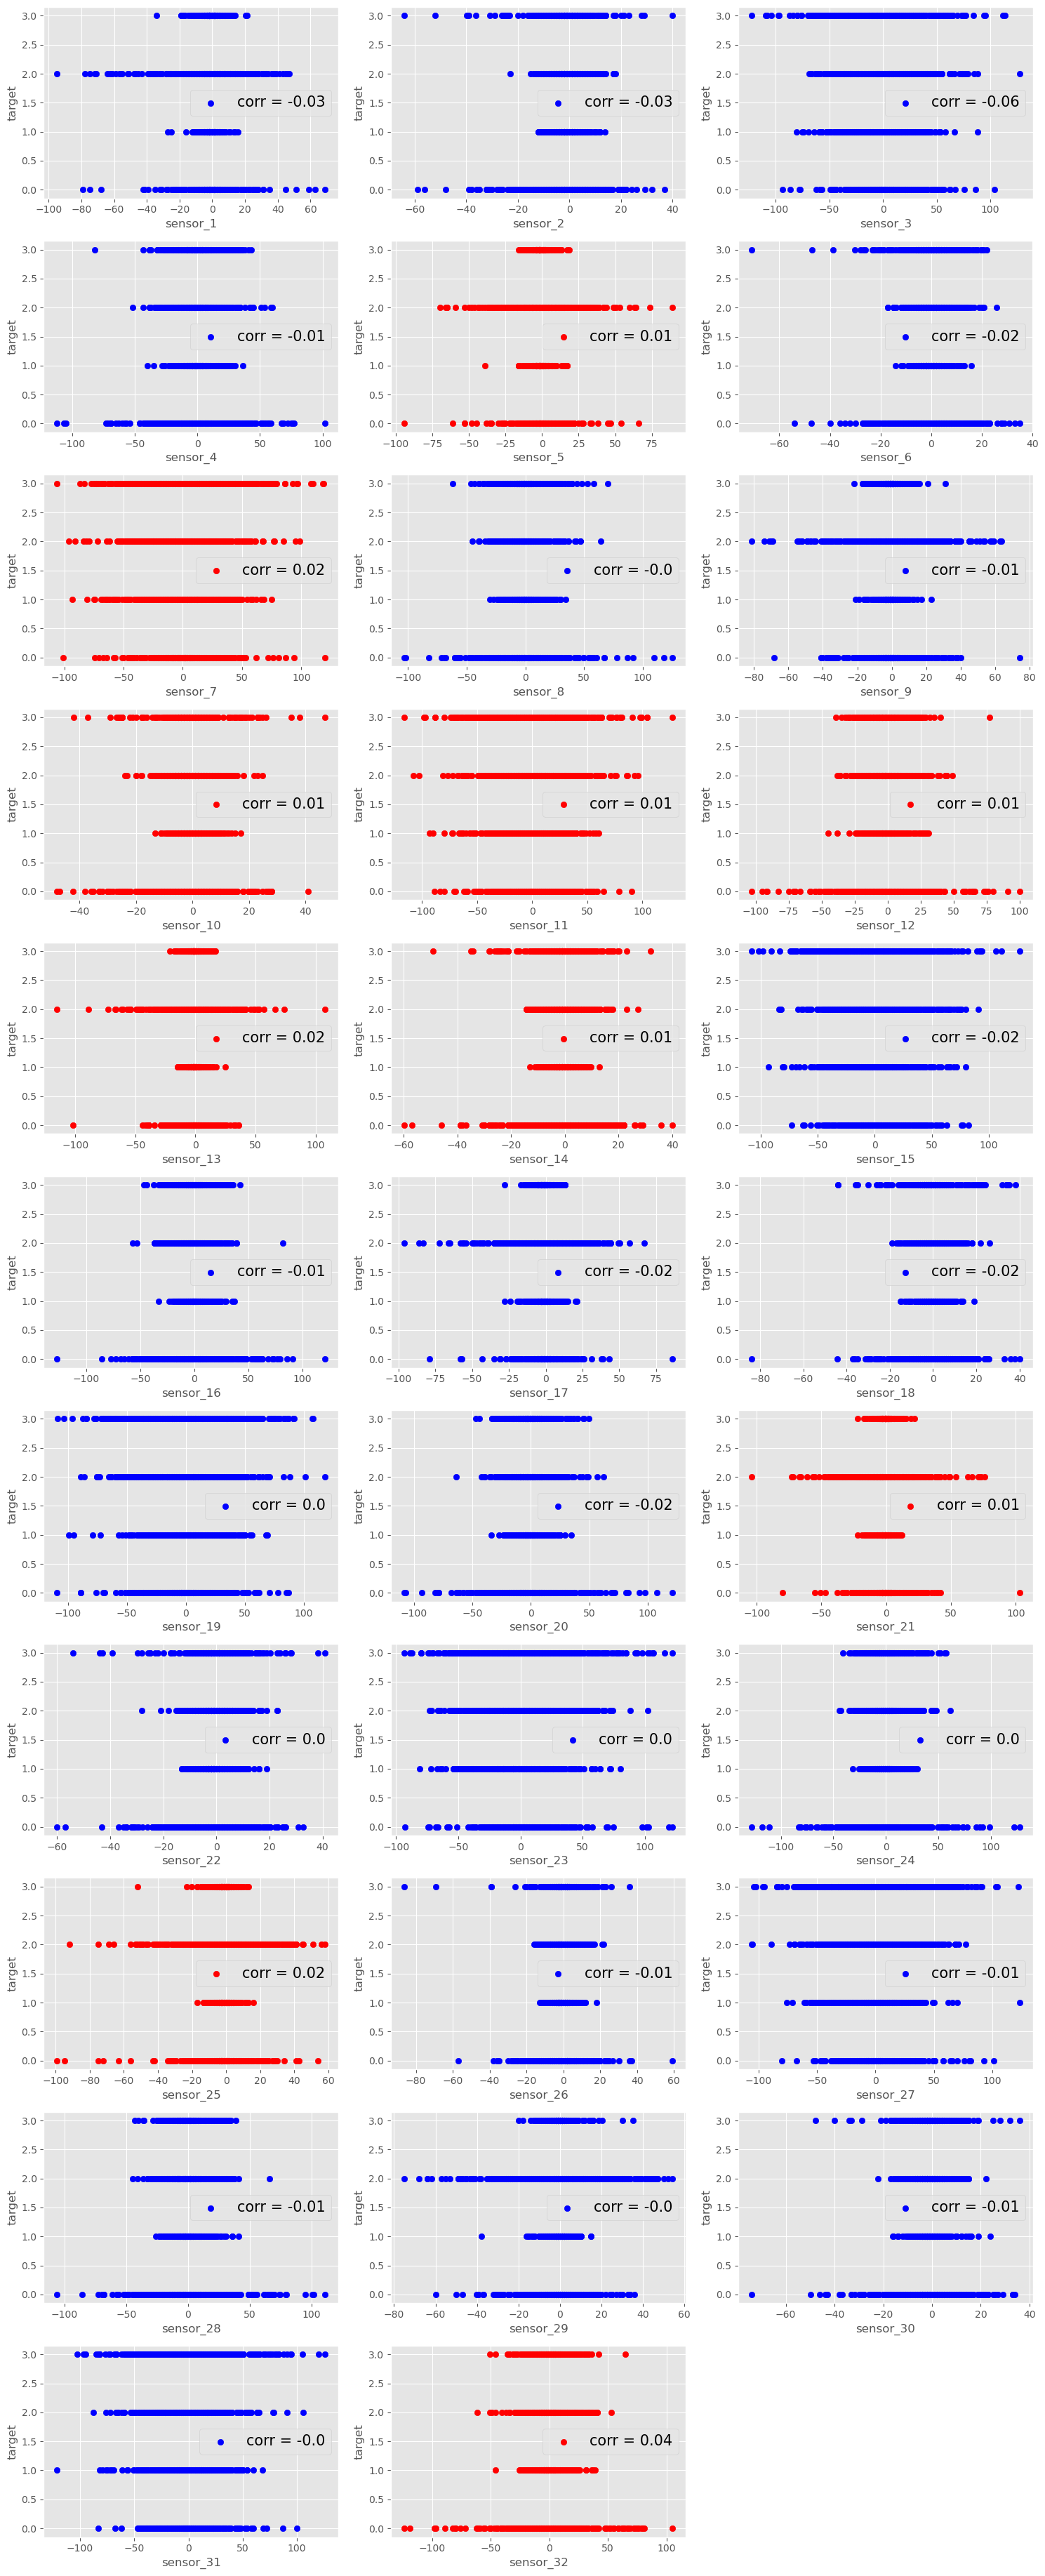

In [7]:
feature = data.columns

plt.figure(figsize=(15,40))

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(11,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

In [9]:
train_X = train.drop(['id','target'],axis=1)
train_y = train.target

test_X = test.drop(['id'],axis=1)

print(train_X.shape, train_y.shape, test.shape)

(2335, 32) (2335,) (9343, 33)


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1868, 32) (467, 32) (1868,) (467,)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [100, 120, 140],
           'max_depth' : [16, 20, 24],
           'min_samples_leaf' : [2, 4],
           'min_samples_split' : [2, 4]
            }

rf_clf = RandomForestClassifier()
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 140}
최고 예측 정확도: 0.7645


In [12]:
rf_clf = RandomForestClassifier(n_estimators=140, 
                                max_depth=24, 
                                min_samples_leaf=2,
                                min_samples_split=4,
                                random_state=42, n_jobs = -1)
rf_clf.fit(x_train, y_train)

predict = rf_clf.predict(x_test)
print(accuracy_score(y_test,predict))

0.7773019271948608


In [13]:
pred = rf_clf.predict(test_X)

submission['target'] = pred
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [14]:
submission.to_csv('./submit_rf_clf.csv',index=False)

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(120, input_dim=32, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.fit(train_X, train_y, epochs=10, batch_size=20)

print('\n Accuracy: %.4f'%(model.evaluate(train_X, train_y)[1]))

Epoch 1/10
117/117 [==============================] - 1s 3ms/step - loss: 2.4954 - accuracy: 0.3358
Epoch 2/10
117/117 [==============================] - 0s 2ms/step - loss: 1.2072 - accuracy: 0.4865
Epoch 3/10
117/117 [==============================] - 0s 2ms/step - loss: 0.9794 - accuracy: 0.5859
Epoch 4/10
117/117 [==============================] - 0s 3ms/step - loss: 0.8368 - accuracy: 0.6578
Epoch 5/10
117/117 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.7096
Epoch 6/10
117/117 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7623
Epoch 7/10
117/117 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7949
Epoch 8/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.8300
Epoch 9/10
117/117 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8552
Epoch 10/10
73/73 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 0.9173



In [16]:
pred = model.predict(test_X)
predicted = pred.argmax(axis=-1)
submission['target'] = predicted
submission

292/292 [==============================] - 1s 2ms/step


,id,target
0,1,2
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,0
9341,9342,0


In [17]:
submission.to_csv('./submit_tf.csv',index=False)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_X)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

clfs = []

rf = RandomForestClassifier()
clfs.append(rf)

gbc = GradientBoostingClassifier()
clfs.append(gbc)

etc = ExtraTreesClassifier()
clfs.append(etc)

params = []

params_rf = {'n_estimators' : [100, 120, 140],
            'min_samples_split' : [2, 4, 6]}
params.append(params_rf)

params_gbc = {'learning_rate':[0.1, 0.12, 0.14, 0.16],
             'n_estimators':[100, 120, 140]}
params.append(params_gbc)

params_etc = {'n_estimators' : [100, 120, 140]}
params.append(params_etc)

In [20]:
from tqdm.auto import tqdm

def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i], n_jobs = -1,verbose=1, cv=5)
        model_grid.fit(train_x,train_y)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(clfs,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


 33%|███▎      | 1/3 [00:26<00:53, 26.83s/it]

Fitting 5 folds for each of 12 candidates, totalling 60 fits


 67%|██████▋   | 2/3 [01:57<01:04, 64.39s/it]

Fitting 5 folds for each of 3 candidates, totalling 15 fits


100%|██████████| 3/3 [01:58<00:00, 39.47s/it]


In [21]:
best_model_list

[RandomForestClassifier(n_estimators=140),
 GradientBoostingClassifier(learning_rate=0.14, n_estimators=140),
 ExtraTreesClassifier()]

In [22]:
best_models = [
    ('RF', RandomForestClassifier(n_estimators=120)),
    ('GBR',GradientBoostingClassifier(learning_rate=0.14, n_estimators=120)),
    ('ET', ExtraTreesClassifier())
]

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=best_models, voting='soft')
voting_clf.fit(train_x,train_y)

VotingClassifier(estimators=[('RF', RandomForestClassifier(n_estimators=120)),
                             ('GBR',
                              GradientBoostingClassifier(learning_rate=0.14,
                                                         n_estimators=120)),
                             ('ET', ExtraTreesClassifier())],
                 voting='soft')

In [23]:
test_x = scaler.transform(test_X)
predictions = voting_clf.predict(test_x)
submission.target = predictions
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [24]:
submission.to_csv("./submit_voting_clf.csv",index = False)

In [25]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import OneHotEncoder

import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour, plot_optimization_history
from optuna.visualization import plot_parallel_coordinate, plot_slice, plot_param_importances

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [26]:
# train 데이터셋에서 첫 번째 열부터 마지막 열의 이전 열까지를 선택하여 train_x에 할당합니다.
train_x = train.iloc[:, 1:-1]

# test 데이터셋에서 첫 번째 열부터 마지막 열까지를 선택하여 test_x에 할당합니다.
test_x = test.iloc[:, 1:]

# train_x를 (-1, 8, 4, 1) shape으로 변형하여 다차원 배열로 만듭니다.
train_x = np.array(train_x).reshape(-1, 8, 4, 1)

# test_x를 (-1, 8, 4, 1) shape으로 변형하여 다차원 배열로 만듭니다.
test_x = np.array(test_x).reshape(-1, 8, 4, 1)

# OneHotEncoder 객체를 생성합니다. 희소 행렬이 아닌 밀집된 형태로 인코딩하도록 설정합니다.
ohe = OneHotEncoder(sparse=False)

# train 데이터프레임의 'target' 열을 One-Hot 인코딩하여 train_y에 할당합니다.
train_y = ohe.fit_transform(train[['target']])

In [27]:
def create_model(num_layer, mid_units, num_filters):
    # Sequential 모델을 생성
    model = Sequential()
    
    # 첫 번째 Convolutional Layer를 추가
    model.add(Conv2D(filters=num_filters[0], kernel_size=(2, 2),
                     activation="elu",
                     input_shape=(8, 4, 1)))
    model.add(BatchNormalization())
    #model.add(Dropout(dropout_rate[0]))
    
    # 추가적인 Convolutional Layer를 num_layer만큼 반복
    for i in range(1, num_layer):
        model.add(Conv2D(filters=num_filters[i], kernel_size=(2, 2), padding="same", activation="elu"))
        model.add(BatchNormalization())
        #model.add(Dropout(dropout_rate[i+1]))
        
    # Global Average Pooling Layer를 추가
    model.add(GlobalAveragePooling2D())
    
    # 중간 Dense Layer를 추가
    model.add(Dense(mid_units, activation='relu'))
    #model.add(Dropout(dropout_rate[-1]))
    
    # 출력 Dense Layer를 추가
    model.add(Dense(4, activation='softmax'))
    
    return model


In [28]:
def cnn_objective(trial: Trial) -> float:
    # Keras 세션 초기화
    keras.backend.clear_session()

    # Trial에서 파라미터 추출
    num_layer = trial.suggest_int("num_layer", 2, 3)
    mid_units = int(trial.suggest_discrete_uniform("mid_units", 30, 150, 10))
    num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 256, 16)) for i in range(num_layer)]

    # Dropout
    # dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    # dropout_rate = [int(trial.suggest_uniform("dropout_rate"+str(ii), 0.0, 0.5)) for ii in range(num_layer+1)]
    
    seed = 42
    kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)  # 5-fold Cross-validation
    es = EarlyStopping(monitor="val_acc", patience=5, mode="max", verbose=0)
    cv = np.zeros((train_x.shape[0], 4))

    # Cross-validation을 수행
    for n, (train_idx, val_idx) in enumerate(kfold.split(train_x, train.target)):
        x_train, y_train = train_x[train_idx], train_y[train_idx]
        x_val, y_val = train_x[val_idx], train_y[val_idx]

        # 모델 체크포인트 설정
        mc = ModelCheckpoint(f"model_{n+1}.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=0)

        # 모델 생성
        model = create_model(num_layer, mid_units, num_filters)

        # 옵티마이저 설정
        optimizer = Adam(learning_rate=trial.suggest_uniform("learning_rate", 0.0005, 0.005))

        # 모델 컴파일 및 학습
        model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"])
        model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[es, mc], verbose=None)

        # 최적의 모델 로드
        best = load_model(f"model_{n+1}.h5")

        # Cross-validation 예측 결과 저장
        cv[val_idx, :] = best.predict(x_val)

    # Cross-validation 평가 결과 출력
    print('multi_logloss:', log_loss(train_y, cv))
    print('accuracy_score:', accuracy_score(np.argmax(train_y, axis=1), np.argmax(cv, axis=1)))

    return accuracy_score(np.argmax(train_y, axis=1), np.argmax(cv, axis=1))


In [29]:
sampler = TPESampler(seed=42)

# Optuna의 Study 객체 생성
cnn_study = optuna.create_study(study_name="cnn_parameter_opt", direction="maximize", sampler=sampler)

# cnn_objective 함수를 최대 20번 실행하여 파라미터 최적화 수행
cnn_study.optimize(cnn_objective, n_trials=20)

[I 2023-05-18 22:13:12,007] A new study created in memory with name: cnn_parameter_opt


15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:14:27,610] Trial 0 finished with value: 0.8762312633832976 and parameters: {'num_layer': 2, 'mid_units': 150.0, 'num_filter_0': 192.0, 'num_filter_1': 160.0, 'learning_rate': 0.0012020838819909643}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.37209783079895187
accuracy_score: 0.8762312633832976
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:14:57,184] Trial 1 finished with value: 0.8732334047109208 and parameters: {'num_layer': 2, 'mid_units': 30.0, 'num_filter_0': 224.0, 'num_filter_1': 160.0, 'learning_rate': 0.003686326600082205}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.38743210340740775
accuracy_score: 0.8732334047109208
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:15:23,741] Trial 2 finished with value: 0.8702355460385439 and parameters: {'num_layer': 2, 'mid_units': 150.0, 'num_filter_0': 224.0, 'num_filter_1': 64.0, 'learning_rate': 0.001318212352431953}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.3700779910570763
accuracy_score: 0.8702355460385439
15/15 [==============================] - 0s 854us/step


[I 2023-05-18 22:15:49,686] Trial 3 finished with value: 0.8728051391862955 and parameters: {'num_layer': 2, 'mid_units': 60.0, 'num_filter_0': 144.0, 'num_filter_1': 112.0, 'learning_rate': 0.0018105311308911887}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.36675288465189615
accuracy_score: 0.8728051391862955
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:16:50,946] Trial 4 finished with value: 0.8676659528907923 and parameters: {'num_layer': 3, 'mid_units': 40.0, 'num_filter_0': 80.0, 'num_filter_1': 96.0, 'num_filter_2': 128.0, 'learning_rate': 0.004033291826268562}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.413366919914185
accuracy_score: 0.8676659528907923
15/15 [==============================] - 0s 1ms/step


[I 2023-05-18 22:17:14,198] Trial 5 finished with value: 0.8680942184154176 and parameters: {'num_layer': 2, 'mid_units': 90.0, 'num_filter_0': 160.0, 'num_filter_1': 16.0, 'learning_rate': 0.003233951833556473}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.37376255600481467
accuracy_score: 0.8680942184154176
15/15 [==============================] - 0s 4ms/step


[I 2023-05-18 22:17:55,715] Trial 6 finished with value: 0.8650963597430407 and parameters: {'num_layer': 2, 'mid_units': 30.0, 'num_filter_0': 256.0, 'num_filter_1': 256.0, 'learning_rate': 0.004137788066524076}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.3957846923161597
accuracy_score: 0.8650963597430407
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:18:28,290] Trial 7 finished with value: 0.8758029978586723 and parameters: {'num_layer': 2, 'mid_units': 40.0, 'num_filter_0': 176.0, 'num_filter_1': 128.0, 'learning_rate': 0.0010491720568015048}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.36306399471772055
accuracy_score: 0.8758029978586723
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:18:55,523] Trial 8 finished with value: 0.8706638115631692 and parameters: {'num_layer': 2, 'mid_units': 30.0, 'num_filter_0': 240.0, 'num_filter_1': 80.0, 'learning_rate': 0.0034813502795929194}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.37955187977465604
accuracy_score: 0.8706638115631692
15/15 [==============================] - 0s 1ms/step


[I 2023-05-18 22:19:31,060] Trial 9 finished with value: 0.8698072805139186 and parameters: {'num_layer': 2, 'mid_units': 90.0, 'num_filter_0': 144.0, 'num_filter_1': 48.0, 'learning_rate': 0.004863130824940514}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.40217802566450517
accuracy_score: 0.8698072805139186
15/15 [==============================] - 0s 3ms/step


[I 2023-05-18 22:20:13,951] Trial 10 finished with value: 0.8638115631691649 and parameters: {'num_layer': 3, 'mid_units': 150.0, 'num_filter_0': 16.0, 'num_filter_1': 192.0, 'num_filter_2': 256.0, 'learning_rate': 0.00221131832113315}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.41361024499149013
accuracy_score: 0.8638115631691649
15/15 [==============================] - 0s 3ms/step


[I 2023-05-18 22:21:24,732] Trial 11 finished with value: 0.8749464668094219 and parameters: {'num_layer': 3, 'mid_units': 120.0, 'num_filter_0': 192.0, 'num_filter_1': 176.0, 'num_filter_2': 16.0, 'learning_rate': 0.0005415245107000296}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.380045347914124
accuracy_score: 0.8749464668094219
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:21:50,679] Trial 12 finished with value: 0.8569593147751606 and parameters: {'num_layer': 2, 'mid_units': 120.0, 'num_filter_0': 96.0, 'num_filter_1': 224.0, 'learning_rate': 0.0005516306657209886}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.4249754135826601
accuracy_score: 0.8569593147751606
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:22:18,456] Trial 13 finished with value: 0.8693790149892934 and parameters: {'num_layer': 2, 'mid_units': 60.0, 'num_filter_0': 192.0, 'num_filter_1': 128.0, 'learning_rate': 0.001201006110855334}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.3835159239344309
accuracy_score: 0.8693790149892934
15/15 [==============================] - 0s 3ms/step


[I 2023-05-18 22:22:56,815] Trial 14 finished with value: 0.8599571734475375 and parameters: {'num_layer': 3, 'mid_units': 120.0, 'num_filter_0': 192.0, 'num_filter_1': 144.0, 'num_filter_2': 256.0, 'learning_rate': 0.0025650796532622586}. Best is trial 0 with value: 0.8762312633832976.


multi_logloss: 0.44739868948617884
accuracy_score: 0.8599571734475375
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:23:24,130] Trial 15 finished with value: 0.8766595289079229 and parameters: {'num_layer': 2, 'mid_units': 70.0, 'num_filter_0': 112.0, 'num_filter_1': 224.0, 'learning_rate': 0.0016266530690134614}. Best is trial 15 with value: 0.8766595289079229.


multi_logloss: 0.35467463309486597
accuracy_score: 0.8766595289079229
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:25:55,869] Trial 16 finished with value: 0.8766595289079229 and parameters: {'num_layer': 2, 'mid_units': 70.0, 'num_filter_0': 96.0, 'num_filter_1': 208.0, 'learning_rate': 0.0018655083539985107}. Best is trial 15 with value: 0.8766595289079229.


multi_logloss: 0.37582059476675583
accuracy_score: 0.8766595289079229
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:26:52,690] Trial 17 finished with value: 0.8728051391862955 and parameters: {'num_layer': 3, 'mid_units': 70.0, 'num_filter_0': 96.0, 'num_filter_1': 224.0, 'num_filter_2': 32.0, 'learning_rate': 0.0020409955049521455}. Best is trial 15 with value: 0.8766595289079229.


multi_logloss: 0.368281976782644
accuracy_score: 0.8728051391862955
15/15 [==============================] - 0s 1ms/step


[I 2023-05-18 22:27:28,028] Trial 18 finished with value: 0.867237687366167 and parameters: {'num_layer': 2, 'mid_units': 80.0, 'num_filter_0': 48.0, 'num_filter_1': 256.0, 'learning_rate': 0.0025321122817087466}. Best is trial 15 with value: 0.8766595289079229.


multi_logloss: 0.3931487768818968
accuracy_score: 0.867237687366167
15/15 [==============================] - 0s 2ms/step


[I 2023-05-18 22:28:20,699] Trial 19 finished with value: 0.8646680942184154 and parameters: {'num_layer': 2, 'mid_units': 100.0, 'num_filter_0': 112.0, 'num_filter_1': 208.0, 'learning_rate': 0.0017927029824423568}. Best is trial 15 with value: 0.8766595289079229.


multi_logloss: 0.3904965123364779
accuracy_score: 0.8646680942184154


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

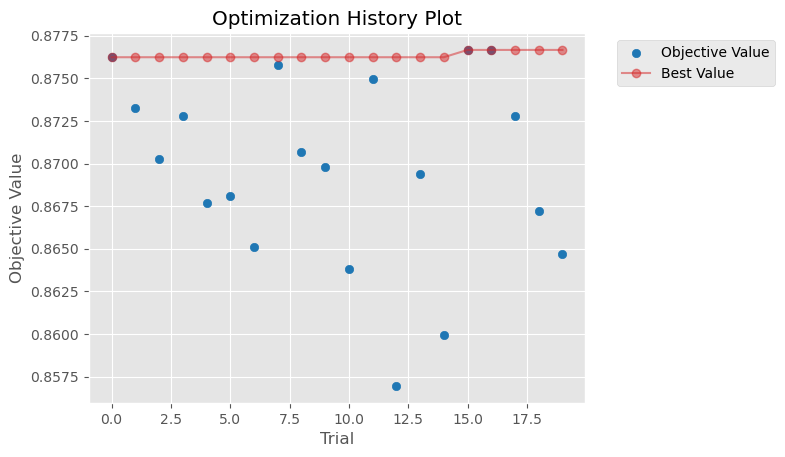

In [30]:
# CNN 모델의 하이퍼파라미터 최적화 과정의 최적화 히스토리 시각화
optuna.visualization.matplotlib.plot_optimization_history(cnn_study)

<Axes: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

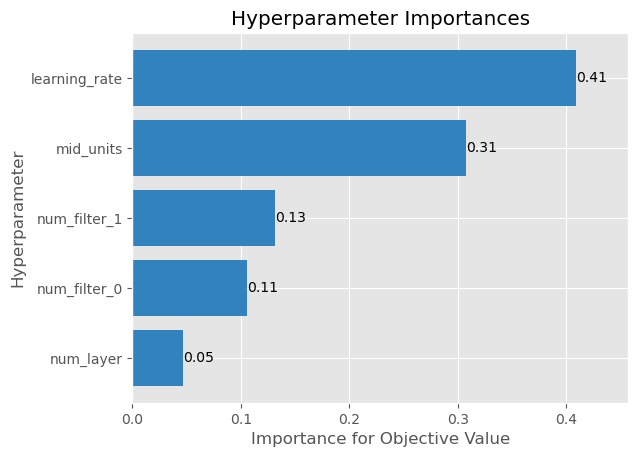

In [31]:
# CNN 모델의 하이퍼파라미터 중요도 시각화
optuna.visualization.matplotlib.plot_param_importances(cnn_study)

array([<Axes: xlabel='learning_rate', ylabel='Objective Value'>,
       <Axes: xlabel='mid_units'>, <Axes: xlabel='num_filter_0'>,
       <Axes: xlabel='num_filter_1'>, <Axes: xlabel='num_filter_2'>,
       <Axes: xlabel='num_layer'>], dtype=object)

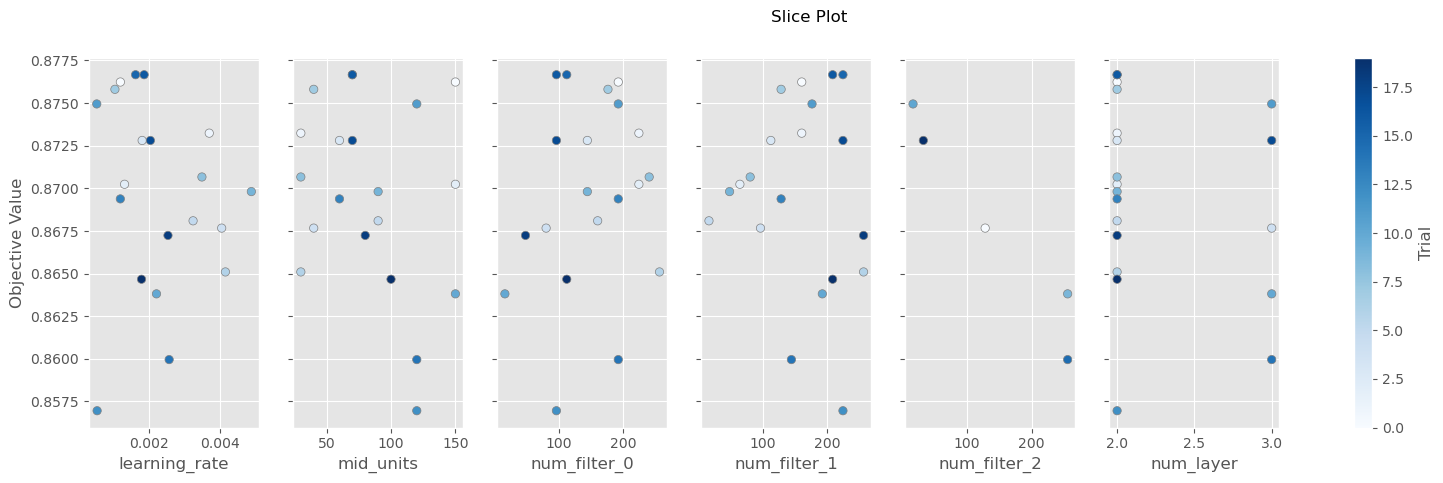

In [32]:
# CNN 모델의 하이퍼파라미터 최적화 과정의 슬라이스 플롯 시각화
optuna.visualization.matplotlib.plot_slice(cnn_study)

In [33]:
cnn_acc = []
cnn_pred = np.zeros((test_x.shape[0], 4))
seed = 42
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
es = EarlyStopping(monitor="val_acc", patience=5, mode="max", verbose=0)

for i, (train_idx, val_idx) in enumerate(skf.split(train_x, train.target)):
    print(f"{i+1} Fold Training.....")
    x_train, y_train = train_x[train_idx], train_y[train_idx]
    x_val, y_val = train_x[val_idx], train_y[val_idx]

    # CNN 모델 생성
    cnn = create_model(cnn_study.best_params['num_layer'], cnn_study.best_params['mid_units'], 
                      [cnn_study.best_params[f'num_filter_{i}'] for i in range(cnn_study.best_params['num_layer'])])

    # 모델 체크포인트 설정
    mc = ModelCheckpoint(f"model_{i+1}.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=0)

    # 모델 컴파일 및 학습
    optimizer = Adam(learning_rate=cnn_study.best_params['learning_rate'])
    cnn.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"])
    cnn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[es, mc], verbose=0)

    # 최고 성능 기록 모델 로드
    best = load_model(f"model_{i+1}.h5")

    # 검증 데이터 예측 및 평가
    val_pred = best.predict(x_val)
    val_cls = np.argmax(val_pred, axis=1)
    fold_cnn_acc = accuracy_score(np.argmax(y_val, axis=1), val_cls)
    cnn_acc.append(fold_cnn_acc)
    print(f"{i+1} Fold ACC of CNN = {fold_cnn_acc}\n")

    # 테스트 데이터 예측 결과 누적
    fold_pred = best.predict(test_x) / skf.n_splits
    cnn_pred += fold_pred


1 Fold Training.....
15/15 [==============================] - 0s 2ms/step
1 Fold ACC of CNN = 0.8479657387580299

292/292 [==============================] - 1s 2ms/step
2 Fold Training.....
15/15 [==============================] - 0s 2ms/step
2 Fold ACC of CNN = 0.8993576017130621

292/292 [==============================] - 1s 2ms/step
3 Fold Training.....
15/15 [==============================] - 0s 2ms/step
3 Fold ACC of CNN = 0.8586723768736617

292/292 [==============================] - 1s 2ms/step
4 Fold Training.....
15/15 [==============================] - 0s 2ms/step
4 Fold ACC of CNN = 0.8715203426124197

292/292 [==============================] - 1s 2ms/step
5 Fold Training.....
15/15 [==============================] - 0s 2ms/step
5 Fold ACC of CNN = 0.880085653104925

292/292 [==============================] - 1s 2ms/step


In [34]:
np.mean(cnn_acc)

0.8715203426124196

In [35]:
submission['target'] = np.argmax(cnn_pred, axis = 1)
submission

,id,target
0,1,0
1,2,0
2,3,1
3,4,3
4,5,2
...,...,...
9338,9339,3
9339,9340,1
9340,9341,2
9341,9342,0


In [36]:
submission.to_csv('./submission_CNN.csv', index = False)